In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/web_mining/Reviews/Reviews_Logitech_B170_Wireless_Mouse,_2.4_GHz_with_USB_Nano_Receiver,_Optical_Tracking,_12_Months_Battery_Life,_Ambidextrous,_PC_Mac_Laptop___Black.csv")
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Anand,Reviewed in India 🇮🇳 on 11 July 2022,5.0,"Small, not too heavy, good looking.","Hi guys! Bought this yesterday, so haven’t use..."
1,1,Anand,Reviewed in India 🇮🇳 on 16 March 2023,4.0,Good,Good mouse but the mouse wheel started making ...
2,2,Adharsh Prakash,Reviewed in India 🇮🇳 on 28 March 2023,4.0,Value for money,Make pointer motion bit fast in windows settin...
3,3,..:: m a n i ::..,Reviewed in India 🇮🇳 on 27 February 2023,4.0,Purchase this 3'rd time,"from last 4 years using this mouse constantly,..."
4,4,Sadam Visar,Reviewed in India 🇮🇳 on 9 March 2023,4.0,Good Quality Mouse,Good Product Easy To hold & Carry


In [ ]:
print(data.isnull().sum())

Unnamed: 0        0
Customer Name     0
Date              0
Ratings           0
Review Title      1
Reviews          16
dtype: int64


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text= [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [ ]:
data['Reviews']= data['Reviews'].apply(clean)
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Anand,Reviewed in India 🇮🇳 on 11 July 2022,5.0,"Small, not too heavy, good looking.",hi guy bought yesterday haven't use much earli...
1,1,Anand,Reviewed in India 🇮🇳 on 16 March 2023,4.0,Good,good mous mous wheel start make nois week use
2,2,Adharsh Prakash,Reviewed in India 🇮🇳 on 28 March 2023,4.0,Value for money,make pointer motion bit fast window set fine v...
3,3,..:: m a n i ::..,Reviewed in India 🇮🇳 on 27 February 2023,4.0,Purchase this 3'rd time,last year use mous constant life mous year l...
4,4,Sadam Visar,Reviewed in India 🇮🇳 on 9 March 2023,4.0,Good Quality Mouse,good product easi hold carri


In [ ]:
ratings= data['Ratings'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure= px.pie(data,
               values=quantity,
               names=numbers, hole=0.5)
figure.show()

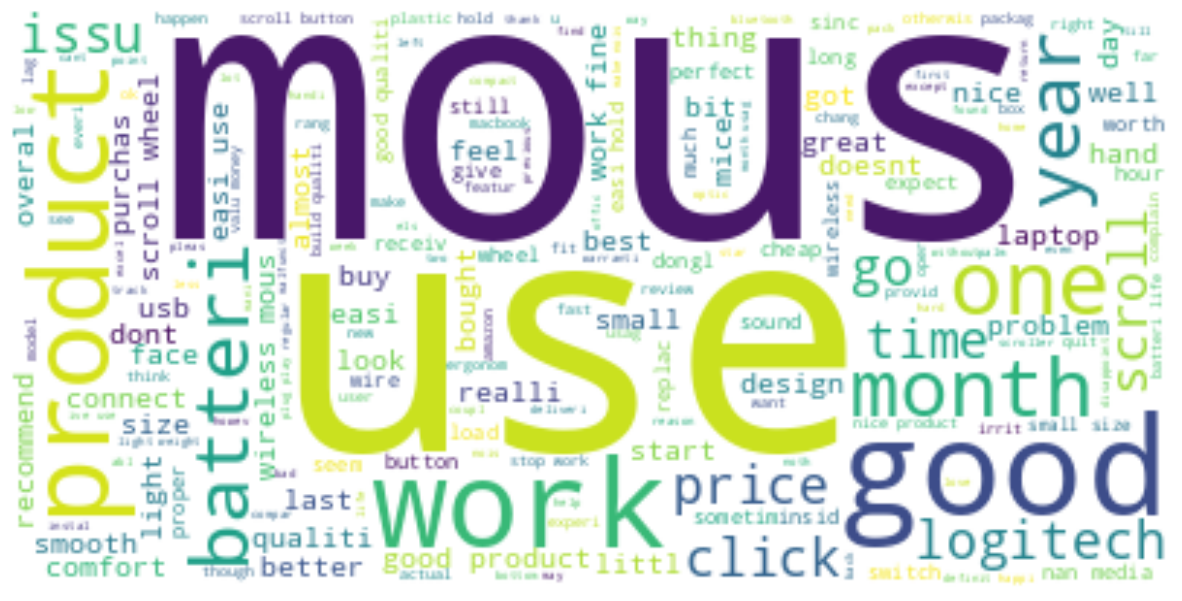

In [ ]:
text= " ".join(i for i in data.Reviews)
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# analysing as positive, negative and neutral
nltk.download('vader_lexicon')
sentiments= SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data['Reviews']]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data['Reviews']]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data['Reviews']]

data=data[['Reviews','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Reviews,Positive,Negative,Neutral
0,hi guy bought yesterday haven't use much earli...,0.144,0.107,0.749
1,good mous mous wheel start make nois week use,0.266,0.000,0.734
2,make pointer motion bit fast window set fine v...,0.167,0.000,0.833
3,last year use mous constant life mous year l...,0.097,0.333,0.570
4,good product easi hold carri,0.420,0.000,0.580


# **What most think**

In [ ]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")
  
sentiment_score(x,y,z)

Neutral


In [ ]:
print("Positive: ",x)
print("Negative: ",y)
print("Neutral: ",z)

Positive:  164.20399999999995
Negative:  17.270000000000007
Neutral:  296.524
